# Shallow RELU Network without Bias (to predict XOR)

y.shape: (4, 1)
Epoch [100/1000], Loss: 0.1908705785
Epoch [200/1000], Loss: 0.0768663099
Epoch [300/1000], Loss: 0.0079708798
Epoch [400/1000], Loss: 0.0002039982
Epoch [500/1000], Loss: 0.0000325946
Epoch [600/1000], Loss: 0.0000193192
Epoch [700/1000], Loss: 0.0000116809
Epoch [800/1000], Loss: 0.0000070586
Epoch [900/1000], Loss: 0.0000042726
Epoch [1000/1000], Loss: 0.0000025890


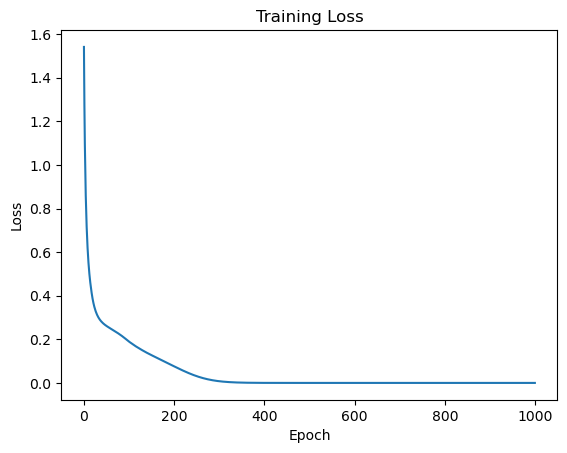

In [35]:
import numpy as np
import matplotlib.pyplot as plt


class ShallowReLUNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights randomly
        self.W1 = np.random.uniform(-1, 1, size=(input_size, hidden_size))
        self.W2 = np.random.uniform(-1, 1, size=(hidden_size, output_size))

    def relu(self, x):
        return np.maximum(0, x)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1)
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2 )
        return self.z2

    def backward(self, X, y, learning_rate):
        # Gradient of loss w.r.t. Z2
        # dLoss_dZ2 = np.dot(-2, (y - self.z2)/y) relative doesn't work atm
        dLoss_dZ2 = np.dot(-2, y - self.z2)
        
        # Gradient of loss w.r.t. W2
        dLoss_dW2 = np.dot(dLoss_dZ2.T, self.a1)
        
        # Gradient of loss w.r.t. A1
        dLoss_dA1 = np.dot(self.W2, dLoss_dZ2.T)
        
        # Gradient of loss w.r.t. Z1
        dLoss_dZ1 = (self.a1 > 0).T * dLoss_dA1
        
        # Gradient of loss w.r.t. W1
        dLoss_dW1 = np.dot(dLoss_dZ1, X)

        self.W2 -= learning_rate * dLoss_dW2.T
        self.W1 -= learning_rate * dLoss_dW1.T

    def train(self, X, y, num_epochs, learning_rate):
        loss_history = []

        for epoch in range(num_epochs):
            output = self.forward(X)
            loss = np.mean((output - y) ** 2)
            loss_history.append(loss)

            self.backward(X, y, learning_rate)

            if (epoch + 1) % 100 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.10f}")

        return loss_history


# Example usage
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]]).reshape(-1, 1)
print(f'y.shape: {y.shape}')

input_size = 2
hidden_size = 8
output_size = 1
num_epochs = 1000
learning_rate = 0.01

network = ShallowReLUNetwork(input_size, hidden_size, output_size)
loss_history = network.train(X, y, num_epochs, learning_rate)

# Plot the loss history
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

# Shallow RELU Network with Bias (to predict XOR)

Epoch [100/1000], Loss: 0.0877702542
Epoch [200/1000], Loss: 0.0091289760
Epoch [300/1000], Loss: 0.0008620030
Epoch [400/1000], Loss: 0.0001053601
Epoch [500/1000], Loss: 0.0000132629
Epoch [600/1000], Loss: 0.0000016750
Epoch [700/1000], Loss: 0.0000002118
Epoch [800/1000], Loss: 0.0000000268
Epoch [900/1000], Loss: 0.0000000034
Epoch [1000/1000], Loss: 0.0000000004


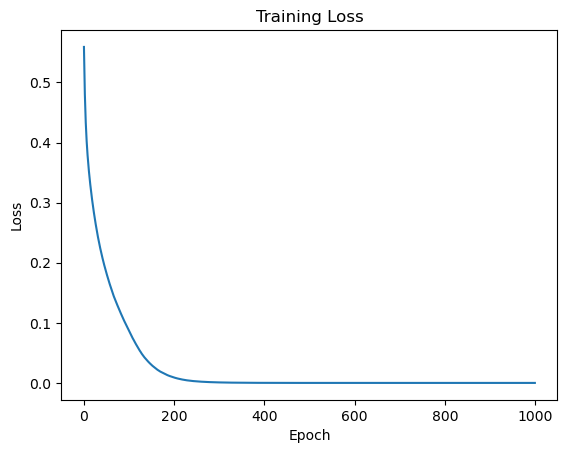

In [60]:
import numpy as np
import matplotlib.pyplot as plt


class ShallowReLUNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights and biases randomly
        self.W1 = np.random.uniform(-1, 1, size=(input_size, hidden_size))
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.uniform(-1, 1, size=(hidden_size, output_size))
        self.b2 = np.zeros((1, output_size))

    def relu(self, x):
        return np.maximum(0, x)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        return self.z2

    def backward(self, X, y, learning_rate):
            # Gradient of loss w.r.t. Z2
            dLoss_dZ2 = np.dot(-2, (y - self.z2))
            
            # Gradient of loss w.r.t. W2
            dLoss_dW2 = np.dot(dLoss_dZ2.T, self.a1)

            # Gradient of bias B2
            dLoss_db2 = np.sum(dLoss_dZ2, axis=0)
            
            # Gradient of loss w.r.t. A1
            dLoss_dA1 = np.dot(self.W2, dLoss_dZ2.T)
            
            # Gradient of loss w.r.t. Z1
            dLoss_dZ1 = (self.a1 > 0) * dLoss_dA1.T
            
            # Gradient of loss w.r.t. W1
            dLoss_dW1 = np.dot(dLoss_dZ1.T, X)

            # Gradient of bias B1
            dLoss_db1 = np.sum(dLoss_dZ1, axis=0, keepdims=True)

            self.W2 -= learning_rate * dLoss_dW2.T
            self.W1 -= learning_rate * dLoss_dW1.T
            self.b2 -= learning_rate * dLoss_db2
            self.b1 -= learning_rate * dLoss_db1


    def train(self, X, y, num_epochs, learning_rate):
        loss_history = []

        for epoch in range(num_epochs):
            output = self.forward(X)
            loss = np.mean((output - y) ** 2)
            loss_history.append(loss)

            self.backward(X, y, learning_rate)

            if (epoch + 1) % 100 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.10f}")

        return loss_history


# Example usage
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

input_size = 2
hidden_size = 8
output_size = 1
num_epochs = 1000
learning_rate = 0.01

network = ShallowReLUNetwork(input_size, hidden_size, output_size)
loss_history = network.train(X, y, num_epochs, learning_rate)

# Plot the loss history
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

# Gradient Descent with $c^2=S(gh, g \sqrt{h\lambda})$ (WORKING)

Epoch [5000/100000], Loss (MSRE): 16075.095633, RMSRE: 126.787600
Epoch [10000/100000], Loss (MSRE): 7821.013845, RMSRE: 88.436496
Epoch [15000/100000], Loss (MSRE): 6093.474055, RMSRE: 78.060707
Epoch [20000/100000], Loss (MSRE): 5054.870163, RMSRE: 71.097610
Epoch [25000/100000], Loss (MSRE): 3364.602301, RMSRE: 58.005192
Epoch [30000/100000], Loss (MSRE): 2795.834060, RMSRE: 52.875647
Epoch [35000/100000], Loss (MSRE): 2063.761873, RMSRE: 45.428646
Epoch [40000/100000], Loss (MSRE): 1779.213748, RMSRE: 42.180727
Epoch [45000/100000], Loss (MSRE): 1522.125508, RMSRE: 39.014427
Epoch [50000/100000], Loss (MSRE): 1336.261559, RMSRE: 36.554912
Epoch [55000/100000], Loss (MSRE): 1237.634453, RMSRE: 35.180029
Epoch [60000/100000], Loss (MSRE): 1242.693854, RMSRE: 35.251863
Epoch [65000/100000], Loss (MSRE): 1221.671771, RMSRE: 34.952422
Epoch [70000/100000], Loss (MSRE): 1190.697758, RMSRE: 34.506489
Epoch [75000/100000], Loss (MSRE): 1172.294369, RMSRE: 34.238785
Epoch [80000/100000], Lo

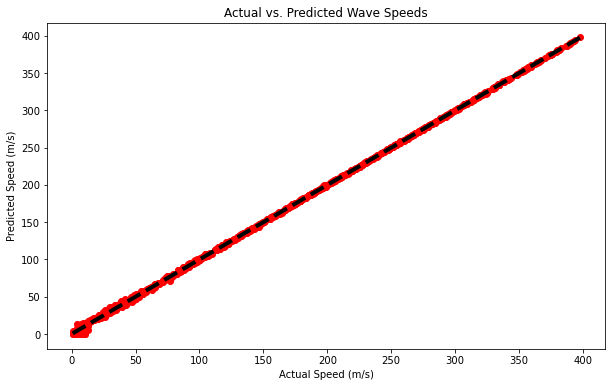

False
      id    expected
0      0  368.980806
1      1   32.678847
2      2   33.392367
3      3   44.764016
4      4  366.438509
..   ...         ...
195  195   33.106446
196  196   72.021692
197  197  182.414686
198  198   45.233560
199  199    0.000000

[200 rows x 2 columns]


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
g = 9.80665  # Gravitational acceleration (m/s^2)

# Load data from CSV
data = pd.read_csv("water_waves_training_data.csv")
h = data['height'].values
lambda_w = data['wave_length'].values
c = data['speed'].values

# Prepare the features based on c^2 = S(gh, g sqrt(h lambda))
X = np.vstack((g * h, g * np.sqrt(h * lambda_w))).T
y = c**2  # Target is c^2

# Normalize the features
mean_X = np.mean(X, axis=0)
std_X = np.std(X, axis=0)
X_scaled = (X - mean_X) / std_X

# Initialize weights and biases
input_size = 2
hidden_size = 32
output_size = 1
learning_rate = 1e-1

# Randomly initialize weights and biases
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
b1 = np.zeros(hidden_size)
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)
b2 = np.zeros(output_size)

# Activation function
def relu(x):
    return np.maximum(0, x)

# Derivative of ReLU
def relu_derivative(x):
    return (x > 0).astype(x.dtype)

# Mean Squared Relative Error Loss
def msre_loss(outputs, targets, epsilon=1e-8):
    return np.mean(((targets - outputs) / (targets + epsilon)) ** 2)

def clip_gradient(grad, max_norm):
    norm = np.linalg.norm(grad)
    if norm > max_norm:
        grad = grad * (max_norm / norm)
    return grad

# Forward pass
def forward(X):
    Z1 = X.dot(W1) + b1
    A1 = relu(Z1)
    Z2 = A1.dot(W2) + b2
    return Z1, A1, Z2

# Training loop
epochs = 100000
losses = []

for epoch in range(epochs):
    Z1, A1, Z2 = forward(X_scaled)
    loss = msre_loss(Z2, y.reshape(-1, 1))
    losses.append(loss)
    
    dZ2 = 2 * (Z2 - y.reshape(-1, 1)) / y.size
    dW2 = A1.T.dot(dZ2)
    db2 = np.sum(dZ2, axis=0)
    
    dA1 = dZ2.dot(W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = X_scaled.T.dot(dZ1)
    db1 = np.sum(dZ1, axis=0)
    
    dW1 = clip_gradient(dW1, max_norm=1.0)
    db1 = clip_gradient(db1, max_norm=1.0)
    dW2 = clip_gradient(dW2, max_norm=1.0)
    db2 = clip_gradient(db2, max_norm=1.0)
    
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    if (epoch + 1) % 5000 == 0:
        rmsre = np.sqrt(loss)  # Calculate RMSRE for reporting
        print(f'Epoch [{epoch + 1}/{epochs}], Loss (MSRE): {loss:.6f}, RMSRE: {rmsre:.6f}')

# Predictions and denormalization
_, _, y_pred = forward(X_scaled)
predicted_speeds = np.sqrt(np.maximum(y_pred.flatten(), 0))

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(c, predicted_speeds, color='red')
plt.plot([c.min(), c.max()], [c.min(), c.max()], 'k--', lw=4)
plt.xlabel('Actual Speed (m/s)')
plt.ylabel('Predicted Speed (m/s)')
plt.title('Actual vs. Predicted Wave Speeds')
plt.show()

# Load the verification data
verification_data = pd.read_csv('water_waves_verification_data_input.csv')
h_ver = verification_data['h'].values
lambda_w_ver = verification_data['lam'].values

# Transform the verification data for the first approach
X_ver_1 = np.vstack((g * h_ver, g * np.sqrt(h_ver * lambda_w_ver))).T

# Normalize the features using the mean and std from the training data
X_ver_scaled_1 = (X_ver_1 - mean_X) / std_X

# Predict using the trained model for approach 1
_, _, y_pred_ver_1 = forward(X_ver_scaled_1)
expected_speed_1 = np.sqrt(np.maximum(y_pred_ver_1.flatten(), 0))

# Prepare the submission DataFrame
submission_1 = pd.DataFrame({
    'id': verification_data['id'],
    'expected': expected_speed_1
})

# Check if submission has null values (sometimes it does)
print(submission_1.isnull().values.any())

# Print the submission DataFrame
print(submission_1)

## create csv fild for submission
#submission_1.to_csv('submission_approach_1v5.csv', index=False)

In [18]:
submission_1.to_csv('submission_approach_1v7.csv', index=False)

# Mini-Batch Stochastic Gradient Descent (Not tested yet)

Epoch [100/5000], MSRE, RMSRE - Training: 14405771.467820, 3795.493574 - Validation: 292135.887106, 540.495964
Epoch [200/5000], MSRE, RMSRE - Training: 14689359.747863, 3832.670055 - Validation: 296824.871354, 544.816365
Epoch [300/5000], MSRE, RMSRE - Training: 14713173.672434, 3835.775498 - Validation: 297248.593973, 545.205093
Epoch [400/5000], MSRE, RMSRE - Training: 14732977.712900, 3838.356121 - Validation: 297572.821170, 545.502357
Epoch [500/5000], MSRE, RMSRE - Training: 14819300.000564, 3849.584393 - Validation: 299292.441184, 547.076266
Epoch [600/5000], MSRE, RMSRE - Training: 14841179.837838, 3852.425189 - Validation: 299649.521001, 547.402522
Epoch [700/5000], MSRE, RMSRE - Training: 14871706.073885, 3856.385104 - Validation: 300190.249736, 547.896203
Epoch [800/5000], MSRE, RMSRE - Training: 14870120.440568, 3856.179514 - Validation: 300036.947303, 547.756285
Epoch [900/5000], MSRE, RMSRE - Training: 14877596.435650, 3857.148744 - Validation: 300009.290875, 547.731039
E

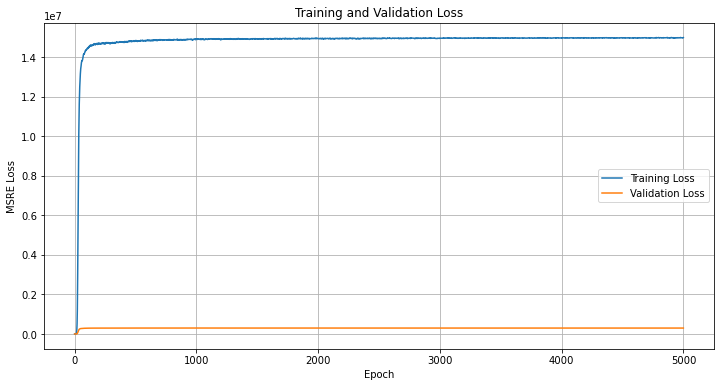

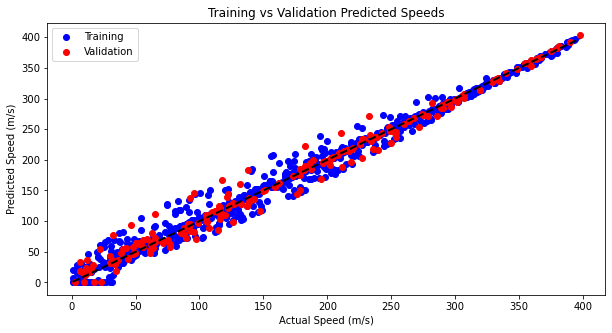

NameError: name 'h_ver' is not defined

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Constants
g = 9.80665  # Gravitational acceleration (m/s^2)

# Load data from CSV
data = pd.read_csv("water_waves_training_data.csv")
h = data['height'].values
lambda_w = data['wave_length'].values
c = data['speed'].values

# Prepare the features based on c^2 = S(gh, g sqrt(h lambda))
X = np.vstack((g * h, g * np.sqrt(h * lambda_w))).T
y = c**2  # Target is c^2

# Normalize the features
mean_X = np.mean(X, axis=0)
std_X = np.std(X, axis=0)
X_scaled = (X - mean_X) / std_X

# Split the dataset into training and validation sets (80:20)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hyperparameters
input_size = 2
hidden_size = 512
output_size = 1
learning_rate = 1e-7  # Adjusted learning rate
batch_size = 64        # Reasonable batch size
epochs = 5000          # Reduced for quicker iteration

# Initialize weights and biases
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
b1 = np.zeros(hidden_size)
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)
b2 = np.zeros(output_size)

# Activation function
def relu(x):
    return np.maximum(0, x)

# Derivative of ReLU
def relu_derivative(x):
    return (x > 0).astype(x.dtype)

# Mean Squared Relative Error Loss
def msre_loss(outputs, targets, epsilon=1e-8):
    return np.mean(((targets - outputs) / (targets + epsilon)) ** 2)

# Forward pass function
def forward(X):
    Z1 = X.dot(W1) + b1
    A1 = relu(Z1)
    Z2 = A1.dot(W2) + b2
    return Z1, A1, Z2

# Compute gradients function
def compute_gradients(X, y, A1, Z1, Z2):
    m = X.shape[0]  # Number of examples
    
    # Backpropagation
    dZ2 = 2 * (Z2 - y.reshape(-1, 1)) / m
    dW2 = A1.T.dot(dZ2)
    db2 = np.sum(dZ2, axis=0)
    
    dA1 = dZ2.dot(W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = X.T.dot(dZ1)
    db1 = np.sum(dZ1, axis=0)
    
    return dW1, db1, dW2, db2

# Training loop with mini-batch SGD
train_losses = []
val_losses = []

for epoch in range(epochs):
    # Shuffle the training set
    permutation = np.random.permutation(len(X_train))
    X_train_shuffled = X_train[permutation]
    y_train_shuffled = y_train[permutation]
    
    for i in range(0, len(X_train), batch_size):
        # Mini-batch
        X_batch = X_train_shuffled[i:i + batch_size]
        y_batch = y_train_shuffled[i:i + batch_size]
        
        # Forward pass
        Z1, A1, Z2 = forward(X_batch)
        
        # Compute loss
        loss = msre_loss(Z2, y_batch)
        
        # Backpropagation
        dW1, db1, dW2, db2 = compute_gradients(X_batch, y_batch, A1, Z1, Z2)
        
        # Update weights and biases
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
    
    # Compute training loss
    _, _, Z2_train = forward(X_train)
    train_loss = msre_loss(Z2_train, y_train)
    train_losses.append(train_loss)
    
    # Compute validation loss
    _, _, Z2_val = forward(X_val)
    val_loss = msre_loss(Z2_val, y_val)
    val_losses.append(val_loss)
    
    if (epoch + 1) % 100 == 0:
        train_rmsre = np.sqrt(train_loss)  # Calculate RMSRE for reporting
        val_rmsre = np.sqrt(val_loss)
        print(f'Epoch [{epoch + 1}/{epochs}], MSRE, RMSRE - Training: {train_loss:.6f}, {train_rmsre:.6f} - Validation: {val_loss:.6f}, {val_rmsre:.6f}')

# Plot training and validation losses
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSRE Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Predictions and denormalization on training data
_, _, y_pred_train = forward(X_train)
predicted_speeds_train = np.sqrt(np.maximum(y_pred_train.flatten(), 0))

# Predictions and denormalization on validation data
_, _, y_pred_val = forward(X_val)
predicted_speeds_val = np.sqrt(np.maximum(y_pred_val.flatten(), 0))

# Visualization of training results
plt.figure(figsize=(10, 5))
plt.scatter(np.sqrt(y_train), predicted_speeds_train, color='blue', label='Training')
plt.scatter(np.sqrt(y_val), predicted_speeds_val, color='red', label='Validation')
plt.plot([c.min(), c.max()], [c.min(), c.max()], 'k--', lw=2)
plt.xlabel('Actual Speed (m/s)')
plt.ylabel('Predicted Speed (m/s)')
plt.title('Training vs Validation Predicted Speeds')
plt.legend()
plt.show()

# Transform the verification data for the first approach
X_ver_1 = np.vstack((g * h_ver, g * np.sqrt(h_ver * lambda_w_ver))).T
X_ver_scaled_1 = (X_ver_1 - mean_X) / std_X

# Predict using the trained model for test data
_, _, y_pred_ver_1 = forward(X_ver_scaled_1)
expected_speed_1 = np.sqrt(np.maximum(y_pred_ver_1.flatten(), 0))

# Prepare the submission DataFrame
submission_1 = pd.DataFrame({
    'id': verification_data['id'],
    'expected': expected_speed_1
})

# Print the submission DataFrame
print(submission_1)

# gradient descent with classes

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Constants
g = 9.80665  # Gravitational acceleration (m/s^2)

class WaterWavePredictor:
    def __init__(self, input_size=2, hidden_size=256, output_size=1, learning_rate=1e-1, max_norm=1.0):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.max_norm = max_norm

        # Initialize weights and biases
        self.W1 = np.random.randn(self.input_size, self.hidden_size) * np.sqrt(2. / self.input_size)
        self.b1 = np.zeros(self.hidden_size)
        self.W2 = np.random.randn(self.hidden_size, self.output_size) * np.sqrt(2. / self.hidden_size)
        self.b2 = np.zeros(self.output_size)

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return (x > 0).astype(x.dtype)

    def msre_loss(self, outputs, targets, epsilon=1e-8):
        return np.mean(((targets - outputs) / (targets + epsilon)) ** 2)

    def clip_gradient(self, grad):
        norm = np.linalg.norm(grad)
        if norm > self.max_norm:
            grad = grad * (self.max_norm / norm)
        return grad

    def forward(self, X):
        Z1 = X.dot(self.W1) + self.b1
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.W2) + self.b2
        return Z1, A1, Z2

    def backward(self, X, Z1, A1, Z2, y):
        dZ2 = 2 * (Z2 - y.reshape(-1, 1)) / y.size
        dW2 = A1.T.dot(dZ2)
        db2 = np.sum(dZ2, axis=0)

        dA1 = dZ2.dot(self.W2.T)
        dZ1 = dA1 * self.relu_derivative(Z1)
        dW1 = X.T.dot(dZ1)
        db1 = np.sum(dZ1, axis=0)

        dW1 = self.clip_gradient(dW1)
        db1 = self.clip_gradient(db1)
        dW2 = self.clip_gradient(dW2)
        db2 = self.clip_gradient(db2)

        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2

    def train(self, X_train, y_train, X_val, y_val, epochs=100000):
        losses_train = []
        losses_val = []

        for epoch in range(epochs):
            Z1_train, A1_train, Z2_train = self.forward(X_train)
            loss_train = self.msre_loss(Z2_train, y_train.reshape(-1, 1))
            losses_train.append(loss_train)

            _, _, Z2_val = self.forward(X_val)
            loss_val = self.msre_loss(Z2_val, y_val.reshape(-1, 1))
            losses_val.append(loss_val)

            self.backward(X_train, Z1_train, A1_train, Z2_train, y_train)

            if (epoch + 1) % 5000 == 0:
                rmsre_train = np.sqrt(loss_train)
                rmsre_val = np.sqrt(loss_val)
                print(f'Epoch [{epoch + 1}/{epochs}], Loss (MSRE) Train: {loss_train:.6f}, RMSRE Train: {rmsre_train:.6f}, Loss (MSRE) Val: {loss_val:.6f}, RMSRE Val: {rmsre_val:.6f}')

        return losses_train, losses_val

    def predict(self, X):
        _, _, Z2 = self.forward(X)
        return np.sqrt(np.maximum(Z2.flatten(), 0))

    def visualize_losses(self, losses_train, losses_val):
        plt.figure(figsize=(10, 6))
        plt.plot(losses_train, label='Training Loss (MSRE)')
        plt.plot(losses_val, label='Validation Loss (MSRE)')
        plt.xlabel('Epochs')
        plt.ylabel('Loss (MSRE)')
        plt.legend()
        plt.title('Training and Validation Loss (MSRE)')
        plt.show()

    def visualize_predictions(self, y_actual, y_train_pred, y_val_pred):
        plt.figure(figsize=(10, 6))
        plt.scatter(y_actual, y_train_pred, color='blue', label='Training Predictions')
        plt.scatter(y_actual, y_val_pred, color='green', label='Validation Predictions')
        plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'k--', lw=4)
        plt.xlabel('Actual Speed (m/s)')
        plt.ylabel('Predicted Speed (m/s)')
        plt.legend()
        plt.title('Actual vs Predicted Wave Speeds (Training and Validation)')
        plt.show()

# Load data from CSV
data = pd.read_csv("water_waves_training_data.csv")
h = data['height'].values
lambda_w = data['wave_length'].values
c = data['speed'].values

# Prepare the features based on c^2 = S(gh, g sqrt(h lambda))
X = np.vstack((g * h, g * np.sqrt(h * lambda_w))).T
y = c**2  # Target is c^2

# Split the data into training and validation sets (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using the training set statistics
mean_X = np.mean(X_train, axis=0)
std_X = np.std(X_train, axis=0)
X_train_scaled = (X_train - mean_X) / std_X
X_val_scaled = (X_val - mean_X) / std_X

# Initialize the WaterWavePredictor class
predictor = WaterWavePredictor()

# Train the model
losses_train, losses_val = predictor.train(X_train_scaled, y_train, X_val_scaled, y_val)

# Predictions and denormalization for training and validation sets
predicted_speeds_train = predictor.predict(X_train_scaled)
predicted_speeds_val = predictor.predict(X_val_scaled)

# Visualization - Training vs Validation Loss
predictor.visualize_losses(losses_train, losses_val)

# Visualization - Actual vs Predicted for Training and Validation sets
predictor.visualize_predictions(c, predicted_speeds_train, predicted_speeds_val)

# Load the verification data
verification_data = pd.read_csv('water_waves_verification_data_input.csv')
h_ver = verification_data['h'].values
lambda_w_ver = verification_data['lam'].values

# Transform the verification data
X_ver = np.vstack((g * h_ver, g * np.sqrt(h_ver * lambda_w_ver))).T

# Normalize the features using the mean and std from the training data
X_ver_scaled = (X_ver - mean_X) / std_X

# Predict using the trained model
expected_speed = predictor.predict(X_ver_scaled)

# Prepare the submission DataFrame
submission = pd.DataFrame({
    'id': verification_data['id'],
    'expected': expected_speed
})

# Check if submission has null values
print(submission.isnull().values.any())

# Print the submission DataFrame
print(submission)

# Create CSV file for submission
# submission.to_csv('submission_approach_with_class.csv', index=False)